## **<ins><center>GAP TUTORIAL</center></ins>**

This notebook provides some basic overview and information on how to read GAP line-of-sight (LOS) total electron content (TEC) netCDF and RINEX files along with plotting the LOS TEC data for each GPS satellite as a function of time. 

### <ins>Table of Contents</ins>
* [About GAP](#about-gap)
* [Prerequisites](#prerequisites)
* [How the files are stored](#how-the-files-are-stored)
    * [GAP Line of Sight(LOS) TEC NetCDF File](#gap-line-of-sight-los-tec-netcdf-file)
    * [GAP Lv2 (RINEX) File](#gap-lv2-rinex-file)
* [Tutorials](#tutorials)
    1. [Reading GAP Line of Sight (LOS) TEC netCDF File](#reading-gap-line-of-sight-netcdf-file)
    2. [Plotting LOS TEC data for each GPS satellite as a function of time](#plotting-los-tec-data-for-each-gps-satellite-as-a-function-of-time)
    3. [Reading Lv2 RINEX file](#reading-lv2-rinex-file)


<a id="about-gap"></a>

### <ins>About GAP</ins>

The e-POP Global Position System (GPS) receiver-based Attitude, Position, and profiling experiment (GAP) is used for spacecraft position and attitude determination and for ionospheric radio occultation profiling measurements. 

GAP employs five differential Global Positioning System receivers and associated antenna complement to provide the e-POP payload with high-resolution spatial positioning information, flight-path velocity determination, and real-time, high-stability timing. In addition, by measuring the arrival times of the various GPS signal wave fronts at each antenna against a very stable time base, the relative range between antennas can be determined, yielding real-time spacecraft attitude determination. One of the GAP antennas (connected to receiver #4) is mounted on the anti-ram side of the spacecraft and dedicated to ionospheric radio occultation measurements. The other four antennas are mounted on the anti-nadir face of the spacecraft. 

<a id="prequisites"></a>

### <ins>Prerequisites</ins>

1. This tutorial assumes you have some basic understanding of Python and its terminology.

2. You will be required to install the following libraries in your python environment:
    *  __[matplotlib](https://matplotlib.org/stable/users/installing/index.html)__
    *  __[numpy](https://numpy.org/install/)__
    *  __[pandas](https://pandas.pydata.org/docs/getting_started/install.html)__
    * __[scipy](https://scipy.org/install/)__

<a id="how-the-files-are-stored"></a>

### <ins>How the files are stored</ins>

<a id="gap-line-of-sight-los-tec-netcdf-file"></a>

#### GAP Line of Sight (LOS) TEC NetCDF file

The GAP Line of Sight TEC netCDF file provides the line of sight total electron content between a given e-POP GPS receiver and any locked GPS satellite. The LOS TEC data has been phase-leveled and bias compensated according to __[Watson, C., et al., (2018) Enhanced Polar Outflow Probe ionospheric radio occultation measurements at high latitudes: Receiver bias estimation and comparison with ground-based observations, Radio Science, 53, 10.1002/2017RS006453](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017RS006453)__.

**<ins>Filename Format</ins>**: "GAP_yyyymmdd_HHMMSS__hhmmss_LOS_TEC_RCVR_r_V.v.r.nc"

&emsp;where,

* r: GAP Receiver number (0-3=GAP-A; 4=GAP-O)
* mm: File month
* dd: File day
* yyyy: File year
* HH: File start hour (UT)
* MM: File start minute (UT)
* SS: File start second (UT)
* hh: File end hour (UT)
* mm: File end minute (UT)
* ss: File end second (UT)
* V: Major code version
* v: Minor code version
* r: Reprocessing count

<a id="gap-lv2-rinex-file"></a>

#### GAP Lv2 (RINEX) File

GAP level 2 RINEX data files are generated for each GAP turn-on session and for each receiver that was operating.

GAP level 2 files are text files, formatted to the Receiver Independent Exchange Format (RINEX) standard, version 3.02. They are produced by the NovAtel-supplied “Convert” software, version 2.6.7. There are two types of RINEX files, O (observation) and N (navigation), and each share the same name as the lv1 file it was created from, save for the file extension. __[Reference R3](https://epop.phys.ucalgary.ca/wp-content/uploads/2021/05/R3-The-Receiver-Independent-Exchange-Format-RINEX-v3.02.pdf)__ describes the RINEX format in detail.

<a id="tutorials"></a>

## **<ins><center>Tutorials</center></ins>**

<a id="reading-gap-line-of-sight-netcdf-file"></a>

#### <ins>Reading GAP Line of Sight (LOS) TEC NetCDF File</ins>

The LOS TEC files are provided in a netCDF format which can be read using *scipy*'s *netcdf_file* function. The files store the data in a NETCDF3 format and each entry of the dataset can be converted to dictionary as below.

In [1]:
from scipy.io import netcdf_file                #for opening .nc files
import re                                       #to find reciever number 

#name/path of .nc file 
filename = "GAP_20190801_221649_240000_LOS_TEC_RCVR_0_2.1.0.nc"
#opening nc file
nc_file = netcdf_file(filename, "r", mmap=False)

vars = nc_file.variables.keys()                 #storing data keys and values in vars
#converting data keys and values to a dictionary 
nc_dict = dict((v, nc_file.variables[v].data) for v in vars)
nc_file.close()                                 #closing the file 

RCVR_num = int(re.findall(r"\d+", filename)[3]) #receiver number from filename 

print("Reciever number: {}".format(RCVR_num))
print("\nDictionary keys as follows:")
print(nc_dict.keys())

Reciever number: 0

Dictionary keys as follows:
dict_keys(['PRNs', 'GPS_DCBs', 'RCVR_DCB', 'RCVR_DCB_RMS', 'UT', 'LOS_TEC', 'L1', 'L2', 'L1_CN0', 'L2_CN0', 'Data_flags', 'XGPS', 'YGPS', 'ZGPS', 'XePOP', 'YePOP', 'ZePOP'])


The above code opens a *.nc* file and converts all the data from the file to a dictionary object. To get the receiver number from which the data is being used we use python's *re* module and store its value in a python integer object.

<a id="plotting-los-tec-data-for-each-gps-satellite-as-a-function-of-time"></a>

#### <ins>Plotting LOS TEC data for each GPS satellite as a function of time</ins>

To plot LOS TEC data as a function of time we will be first converting the data from *nc_dict* to pandas dataframe and then grouping by PRNs to create an individual plot for each GPS satellite. 

The following example considers that you have all the *.nc* files from one day stored in one folder and are planning to create a LOS TEC plot for the entire day.

1. Importing all the necessary libraries and getting the path to *.nc* directory.

In [2]:
from scipy.io import netcdf_file    #to work with .nc files 
import os                           #to finc .nc files in a directory 
import re                           #to find reciever number 
import datetime                     #to get starting datetime from filename
import pandas as pd                 #to work with dataframes            
import io                           #to work with strings
import matplotlib.pyplot as plt     #for plotting
import matplotlib.dates as mdates   #formatting dates on plot
import numpy as np                  #sorting unique PRN values 

#path where .nc files are stored
#in this case the files are stored in the same folder as this notebook 
path_to_nc = os.getcwd()

#an empty list where the row information will be stored
rows = []                   

2. In this step, we will be creating a list of rows from *.nc* dictionary which would have the elements as [PRN, UTC, RCVR_num, LOS_TEC]. The LOS_TEC values within the *.nc* files are stored as a table with the rows being UT hours and columns being PRN number, for easier plotting we will be unfolding this table using nested *for* loops.

&emsp;The basic code for this step will be looking for *.nc* files within the directory, if a file ends with *.nc* extension then we gather the starting datetime and recevier number from the filename and proceed to gather the UT and PRN information.  

In [3]:
#loop to go over each file within a directory 
for file in os.listdir(path_to_nc):

    if file.endswith(".nc"):
        print("Working with {}".format(file))

        #getting the starting datetime from filename
        start_time = datetime.datetime.strptime(re.search(
                                                r"\d{4}\d{2}\d{2}_\d{2}\d{2}\d{2}"
                                                , file).group(),
                                                "%Y%m%d_%H%M%S")
        #making sure that the time starts at 00:00:00
        #as the UT time is in hours from 00:00:00
        start_time = start_time.replace(hour=0, minute=0, second=0)

        #getting reciever number from filename
        #the 3rd value from the following list would correspond to reciever number
        RCVR_Num = int(re.findall(r"\d+", file)[3])


        #opening .nc file
        f = netcdf_file(file, "r", mmap=False)
        #getting all the data (keys and values) into vars
        vars = f.variables.keys()
        #converting all the info from vars to dictionary 
        d=dict((v, f.variables[v].data) for v in vars)
        f.close()

        #following block of code will convert LOS_TEC to 1 dimension

        #loop to iterate over all PRN numbers present within the data
        for i in range(len(d["PRNs"])):
        
            #loop to iterate over all UT hours present within the data
            for j in range(len(d["UT"])):
                #adding UT hours to starting datetime
                time = start_time + datetime.timedelta(hours=d["UT"][j])
                #converting datetime to string 
                time = time.strftime("%Y-%m-%d_%H:%M:%S.%f")

                #row information 
                row = str(str(d["PRNs"][i])+" "+str(time)+" "+str(RCVR_Num)+" "
                          +str(d["LOS_TEC"][i][j]))
                #appending row information to its list
                rows.append(row)
   

Working with GAP_20190801_221649_240000_LOS_TEC_RCVR_0_2.1.0.nc
Working with GAP_20190801_221650_235959_LOS_TEC_RCVR_2_2.1.0.nc
Working with GAP_20190801_221651_240000_LOS_TEC_RCVR_3_2.1.0.nc


3. With the row information in a list, can move onto creating a pandas DataFrame using this. 

In [4]:
#column names for the dataframe 
column_names = """PRN  UTC  RCVR  LOS_TEC"""

#inserting column names string as the first element
rows.insert(0, column_names)

#converting the list separated with whitespace as delimiter to dataframe
TEC_df = pd.read_csv(io.StringIO("\n".join(rows)), delim_whitespace=True)

#converting UTC column to datetime column 
TEC_df["UTC"] = pd.to_datetime(TEC_df["UTC"],
                                format="%Y-%m-%d_%H:%M:%S.%f")

print(TEC_df.head())
print("\n{}".format(TEC_df.dtypes))

   PRN                        UTC  RCVR    LOS_TEC
0   20 2019-08-01 22:16:48.998108     0  15.395672
1   20 2019-08-01 22:16:49.998108     0  15.386823
2   20 2019-08-01 22:16:50.998108     0  15.381049
3   20 2019-08-01 22:16:51.998108     0  15.361867
4   20 2019-08-01 22:16:52.998108     0  15.358225

PRN                 int64
UTC        datetime64[ns]
RCVR                int64
LOS_TEC           float64
dtype: object


4. Finally, we can get the unique values for PRNs from the dataframe and plot LOS_TEC as a function of time. For demonstration purposes we will be plotting the first 6 satellites. 

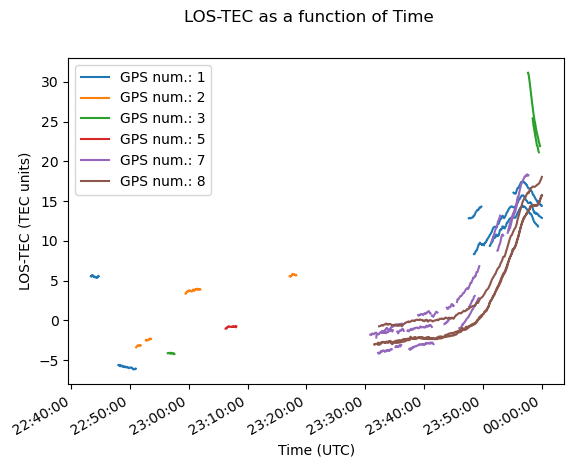

In [5]:
#numpy array of unique PRN values
PRN_unique = TEC_df["PRN"].unique()                     
#sorting values in an ascending order
PRN_unique = np.sort(PRN_unique, axis=0)                

#variable to break for loop when after plotting 6 satellites
flag = 0                                                

#this loop will plot the LOS_TEC values on the same plot 
for i in range(len(PRN_unique)):
    #temporary dataframe for unique value of PRN
    tempdf = TEC_df[TEC_df["PRN"]==PRN_unique[i]]       
    
    #plotting LOS_TEC as function of time 
    plt.plot(tempdf["UTC"], tempdf["LOS_TEC"], label="GPS num.: "+str(PRN_unique[i]))
    
    flag+=1                                 #iterating flag variable
    #the following condition will be true after 6 trendlines are plotted
    if flag==6:
        break


#formatting the plot 
plt.legend()
plt.suptitle("LOS-TEC as a function of Time")
plt.xlabel("Time (UTC)")
plt.ylabel("LOS-TEC (TEC units)")
plt.gcf().autofmt_xdate()
fmt = mdates.DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(fmt)
plt.show()

<a id="reading-lv2-rinex-file"></a>

#### <ins>Reading Lv2 (RINEX) File</ins>

The Receiver Independent Exchange Format (RINEX) files contain the raw GPS pseudorange, doppler shift, carrier phase, and signal strength data, and can be interpreted as text files in python. Lines in RINEX files that start with '>' contain information about measurement datetime and the number of satellites which were observed during the epoch. The subsequent lines contain information about the GPS satellite signals, including both the L1 and L2 bands. 

To read RINEX files, we will first go through a directory which contains these files, read information from each line, append the information to a list and finally convert it to a pandas dataframe. The entire process is described below in steps.

1. Import necessary modules

In [11]:
import io               #for string operations
import os               #to look for RINEX files
import re               #to find reciever information
import pandas as pd     #for dataframes

2. Enter the search pattern for RINEX files and the directory to look into.

&emsp;**NOTE:** By default, the ending extension of RINEX observation files is .*year*O.

In [12]:
search_extension = ".19O"       #file extension to look for 

#directory where RINEX files are stored     
path_to_RINEX = r"D:\comm_soft_tools\python_codes\tutorials\GAP_tutorial"              

3. Going over each file within the directory and appending the epoch information to a list. 

In [13]:
rows = []                   #empty list to store row information

#loop to go over each file in the directory 
for file in os.listdir(path_to_RINEX):

    #the following condition will be true if any files have search_extension
    if file.endswith(search_extension):

        print("Working with {}".format(file))

        #3rd element of nums in filename is the reciever number
        RCVR_num = int(re.findall(r"\d+", file)[3])     

        #opening file
        RINEX_file = open(file)                         
        #reading lines from the file
        lines = RINEX_file.readlines()                  
        #closing file
        RINEX_file.close()                              


        #loop to go over each line and append appropriate info to rows
        for i in range(len(lines)):

            #condition true if line starts with ">"
            if lines[i].startswith(">"):
                #datetime info
                date = str(lines[i].strip(" >\n"))      

                #loop to add satellite information after datetime is saved
                for j in range(i+1, len(lines)):

                    #if the next line does not start with ">",
                    #then it contains satellite info
                    if not lines[j].startswith(">"):
                        sat_info = str(lines[j].strip())#satellite information

                        #following we convert all the information to a string 
                        #separated with whitespaces
                        row = str(str(RCVR_num) + " " + date + " " + sat_info)  

                        #appending row information to its list
                        rows.append(row)                

                    #condition true if next line starts with ">"
                    else:
                        #breaking this block of for loop 
                        break                       

Working with GAP_20190801_221631_235959_RCVR_0_3.1.1.19O
Working with GAP_20190801_221632_235959_RCVR_2_3.1.1.19O
Working with GAP_20190801_221633_235959_RCVR_3_3.1.1.19O


The above code consists of 3 nested *for* loops, the first one goes over all the files within a directory to see which ones match the file extension, the second one opens a file when the pattern is matched and goes over each line to check which ones start with *>*. The last loop looks for satellite information after a '>' match is found. 

**NOTE:** The above code will append information from all RINEX files to *rows* list. 

4. Converting *rows* list to pandas DataFrame.

In [14]:
#column names for the dataframe
column_names = """RCVR_Num  Year  Month  Day  Hour  Minute  Second  Epoch_Flag \
                  Num_GPS_Sat_Obs  RCVR_clck_off  Sat_num  Pseudorange  band  \
                  Carr_Phase  band(Carr_Phase)  Doppler_Shift  Signal_Strength  \
                  Pseudorange_2  band_2  Carr_Phase_2  band(Carr_Phase)_2  \
                  Doppler_Shift_2  Signal_Strength_2"""


#inserting column names at the first postion
rows.insert(0, column_names)                            

#converting rows list to dataframe using io.StringIO with whitespace as delim
RINEX_df = pd.read_csv(io.StringIO("\n".join(rows)), delim_whitespace=True)

#merging datetime information into one column
RINEX_df["Time"] = RINEX_df["Year"].astype(str)+"-"+RINEX_df["Month"].astype(str)+"-"\
                +RINEX_df["Day"].astype(str)+"_"+RINEX_df["Hour"].astype(str)+":"\
                +RINEX_df["Minute"].astype(str)+":"+RINEX_df["Second"].astype(str)

#deleting no longer useful columns 
RINEX_df = RINEX_df.drop(columns=["Year", "Month", "Day", "Hour", "Minute", "Second"])

#moving datetime column to the first position
RINEX_df = RINEX_df[["Time"]+[col for col in RINEX_df.columns if col != 'Time' ]]

#converting datetime column to datetime object 
RINEX_df["Time"] = pd.to_datetime(RINEX_df["Time"],
                                  format="%Y-%m-%d_%H:%M:%S.%f")

print(RINEX_df.head())

                 Time  RCVR_Num  Epoch_Flag  Num_GPS_Sat_Obs  RCVR_clck_off  \
0 2019-08-01 22:16:49         0           0                9           -0.0   
1 2019-08-01 22:16:49         0           0                9           -0.0   
2 2019-08-01 22:16:49         0           0                9           -0.0   
3 2019-08-01 22:16:49         0           0                9           -0.0   
4 2019-08-01 22:16:49         0           0                9           -0.0   

  Sat_num   Pseudorange  band    Carr_Phase  band(Carr_Phase)  Doppler_Shift  \
0     G20  2.104012e+07     8  1.105666e+08               8.0      -8398.664   
1     G26  2.015212e+07     8  1.086882e+08               8.0      -9973.441   
2     G16  2.140915e+07     8  1.152940e+08               8.0     -26048.156   
3     G29  2.564754e+07     8  1.375668e+08               8.0      -4578.371   
4     G21  2.383944e+07     7  1.252771e+08               7.0     -34468.324   

   Signal_Strength  Pseudorange_2  band_2  C